# Questions

1. Which product is returned most often?
2. High rating = customer returns?
3. Sales trend over months.
4. Shipping costs vs sales.

# Data Prep

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import data

In [2]:
source_folder  = 'Source Data'
print(os.listdir(source_folder))

['Costs.xlsx', 'orders.csv', 'order_positions.csv', 'order_ratings.csv', 'order_returns.csv', 'products.csv', 'product_groups.csv']


### Costs.xlsx

In [3]:
df_costs = pd.read_excel(os.path.join(source_folder, 'Costs.xlsx'), sheet_name='cost_forecast')
print(df_costs.info())
df_costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           16 non-null     object
 1   ship           16 non-null     object
 2   cost_forecast  16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes
None


,year,ship,cost_forecast
0,Y2018,First Class,70000
1,Y2018,Same Day,30000
2,Y2018,Second Class,70000
3,Y2018,Standard Class,300000
4,Y2019,First Class,70000


### orders.csv

In [4]:
df_orders = pd.read_csv(os.path.join(source_folder, 'orders.csv'), sep=';')
print(df_orders.info())
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   order_id           5009 non-null   int64 
 1   customer_id        5009 non-null   int64 
 2   order_date         5009 non-null   object
 3   shipping_date      5009 non-null   object
 4   shipping_mode      5009 non-null   object
 5   delivery_country   5009 non-null   object
 6   delivery_city      5009 non-null   object
 7   delivery_state     5009 non-null   object
 8   delivery_zip_code  5009 non-null   int64 
 9   return             5009 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 391.5+ KB
None


,order_id,customer_id,order_date,shipping_date,shipping_mode,delivery_country,delivery_city,delivery_state,delivery_zip_code,return
0,328,166,04.12.2020,07.12.2020,Second Class,United States,Henderson,Kentucky,42420,37
1,329,262,08.07.2020,12.07.2020,Second Class,United States,Los Angeles,California,90036,1
2,330,728,06.11.2019,13.11.2019,Standard Class,United States,Fort Lauderdale,Florida,33311,47
3,331,111,05.07.2018,10.07.2018,Standard Class,United States,Los Angeles,California,90032,7
4,332,25,11.05.2021,16.05.2021,Standard Class,United States,Concord,North Carolina,28027,14


### order_positions.csv

In [5]:
df_order_positions = pd.read_csv(os.path.join(source_folder, 'order_positions.csv'), sep=';')
print(df_order_positions.info())
df_order_positions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           9994 non-null   int64  
 1   order_position_id  9994 non-null   int64  
 2   product_id         9994 non-null   int64  
 3   item_quantity      9994 non-null   int64  
 4   position_discount  9994 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 390.5 KB
None


,order_id,order_position_id,product_id,item_quantity,position_discount
0,328,108,13,2,0.00
1,328,109,57,3,0.00
2,329,110,960,2,0.00
3,330,111,328,5,0.45
4,330,112,1338,2,0.20


### order_ratings.csv

In [6]:
df_order_ratings = pd.read_csv(os.path.join(source_folder, 'order_ratings.csv'), sep=';')
print(df_order_ratings.info())
df_order_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   order_id  745 non-null    int64
 1   rating    745 non-null    int64
dtypes: int64(2)
memory usage: 11.8 KB
None


,order_id,rating
0,330,5
1,339,5
2,353,1
3,363,2
4,376,5


### order_returns.csv

In [7]:
df_order_returns = pd.read_csv(os.path.join(source_folder, 'order_returns.csv'), sep=';')
print(df_order_returns.info())
df_order_returns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   order_id         103 non-null    int64
 1   next_order_free  103 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
None


,order_id,next_order_free
0,329,0
1,359,0
2,367,0
3,374,0
4,455,0


### products.csv

In [8]:
df_products = pd.read_csv(os.path.join(source_folder, 'products.csv'), sep=';')
print(df_products.info())
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     1894 non-null   int64  
 1   group_id       1894 non-null   int64  
 2   product_name   1894 non-null   object 
 3   product_price  1894 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB
None


,product_id,group_id,product_name,product_price
0,1847,17,Ativa-D5772-2-Line-5.8GHz-Digital-Expandable-C...,164.99
1,1759,17,I-Needs-3d-Hello-Kitty-Hybrid-Silicone-Case-Co...,11.96
2,1829,17,Panasonic-KX-TG9541B-DECT-6.0-Digital-2-Line-E...,149.99
3,1745,17,iKross-Bluetooth-Portable-Keyboard-+-Cell-Phon...,20.95
4,413,5,Holmes-Cool-Mist-Humidifier-for-the-Whole-Hous...,19.90


### product_groups.csv

In [9]:
df_product_groups = pd.read_csv(os.path.join(source_folder, 'product_groups.csv'), sep=';')
print(df_product_groups.info())
df_product_groups.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   group_id  17 non-null     int64 
 1   group     17 non-null     object
 2   category  17 non-null     object
dtypes: int64(1), object(2)
memory usage: 540.0+ bytes
None


,group_id,group,category
0,1,Bookcases,Furniture
1,2,Chairs,Furniture
2,3,Furnishings,Furniture
3,4,Tables,Furniture
4,5,Appliances,Office Supplies


## Clean and join data

### Clean before joining

In [10]:
# Costs #########

# Clean year
df_costs['year'] = df_costs['year'].str.extract(r'(\d{4})').astype(int)
df_costs.head()
# costs already aggregated to shipping mode and year

,year,ship,cost_forecast
0,2018,First Class,70000
1,2018,Same Day,30000
2,2018,Second Class,70000
3,2018,Standard Class,300000
4,2019,First Class,70000


In [11]:
# Orders ###

# drop unnecessary columns from orders
df_orders = df_orders.drop(columns=['shipping_date', 'delivery_country', 'delivery_city', 'delivery_state', 'delivery_zip_code', 'return'])
df_orders.head()

,order_id,customer_id,order_date,shipping_mode
0,328,166,04.12.2020,Second Class
1,329,262,08.07.2020,Second Class
2,330,728,06.11.2019,Standard Class
3,331,111,05.07.2018,Standard Class
4,332,25,11.05.2021,Standard Class


In [12]:
# order_returns ###

# Add is returned flag
df_order_returns['is_returned'] = 1
df_order_returns.head()

,order_id,next_order_free,is_returned
0,329,0,1
1,359,0,1
2,367,0,1
3,374,0,1
4,455,0,1


### Join data

In [13]:
# orders, order_positions, products ( product groups not needed for analysis ) 
df1 = pd.merge(
    pd.merge(df_orders, df_order_positions, on='order_id', how='inner'),
    df_products, on='product_id', how='inner'
)
df1.head()

,order_id,customer_id,order_date,shipping_mode,order_position_id,product_id,item_quantity,position_discount,group_id,product_name,product_price
0,328,166,04.12.2020,Second Class,108,13,2,0.00,1,Bush-Somerset-Collection-Bookcase,130.98
1,3015,343,05.05.2020,Standard Class,5507,13,5,0.15,1,Bush-Somerset-Collection-Bookcase,130.98
2,4628,743,20.09.2021,Standard Class,8742,13,2,0.50,1,Bush-Somerset-Collection-Bookcase,130.98
3,4995,49,27.05.2021,First Class,9442,13,3,0.20,1,Bush-Somerset-Collection-Bookcase,130.98
4,328,166,04.12.2020,Second Class,109,57,3,0.00,2,Hon-Deluxe-Fabric-Upholstered-Stacking-Chairs-...,243.98


In [14]:
# add order_returns, order_ratings
df = pd.merge(
    pd.merge(df1, df_order_returns, on='order_id', how='left'),
    df_order_ratings, on='order_id', how='left'
)
df.head()

,order_id,customer_id,order_date,shipping_mode,order_position_id,product_id,item_quantity,position_discount,group_id,product_name,product_price,next_order_free,is_returned,rating
0,328,166,04.12.2020,Second Class,108,13,2,0.00,1,Bush-Somerset-Collection-Bookcase,130.98,NaN,NaN,NaN
1,3015,343,05.05.2020,Standard Class,5507,13,5,0.15,1,Bush-Somerset-Collection-Bookcase,130.98,NaN,NaN,NaN
2,4628,743,20.09.2021,Standard Class,8742,13,2,0.50,1,Bush-Somerset-Collection-Bookcase,130.98,NaN,NaN,NaN
3,4995,49,27.05.2021,First Class,9442,13,3,0.20,1,Bush-Somerset-Collection-Bookcase,130.98,NaN,NaN,NaN
4,328,166,04.12.2020,Second Class,109,57,3,0.00,2,Hon-Deluxe-Fabric-Upholstered-Stacking-Chairs-...,243.98,NaN,NaN,NaN


In [5]:
# check join
df[df['is_returned'].notna() & df['rating'].notna()].head()

NameError: name 'df' is not defined

### Useful functions

In [16]:
def print_result(s):
    print('\n', '-' * len(s), '\n', s, '\n', '-' * len(s), '\n')

# Q1: Which product is returned most often?

In [17]:
# returned
df_prod_returned = df[df['is_returned'] == 1]
df_prod_returned_agg = df_prod_returned.groupby(['product_id', 'product_name']).agg(
    qty_returned=('item_quantity', 'sum'),
    orders_returned=('order_id', 'nunique')
)

# total
df_prod_total_agg = df.groupby(['product_id', 'product_name']).agg(
    qty_total = ('item_quantity', 'sum'),
    orders_total =('order_id', 'nunique')
)

# join
df_prod_returned_agg_f = pd.merge(df_prod_returned_agg, df_prod_total_agg, on = ['product_id', 'product_name'], how='inner')

# add % share 
df_prod_returned_agg_f['qty_return_prc'] =  round((df_prod_returned_agg_f['qty_returned'] / df_prod_returned_agg_f['qty_total']) * 100, 2)
df_prod_returned_agg_f['orders_return_prc'] =  round((df_prod_returned_agg_f['orders_returned'] / df_prod_returned_agg_f['orders_total']) * 100, 2)

# sort
df_prod_returned_agg_f = df_prod_returned_agg_f.sort_values(by='qty_returned', ascending=False)

#show result
print_result('Top 10 products returned sorted by total returned quantity')
df_prod_returned_agg_f.head(10)


 ---------------------------------------------------------- 
 Top 10 products returned sorted by total returned quantity 
 ---------------------------------------------------------- 



,,qty_returned,orders_returned,qty_total,orders_total,qty_return_prc,orders_return_prc
product_id,product_name,,,,,,
1734,Polycom-VVX-310-VoIP-phone,13,2,40,8,32.50,25.00
669,Avery-Durable-Binders,13,2,50,12,26.00,16.67
1128,Xerox-232,11,1,19,4,57.89,25.00
996,Permanent-Self-Adhesive-File-Folder-Labels-for-Typewriters-1-1-8-x-3-1-2-White,11,1,29,6,37.93,16.67
125,Global-Super-Steno-Chair,10,2,30,7,33.33,28.57
1592,Logitech-910-002974-M325-Wireless-Mouse-for-Web-Scrolling,9,2,52,15,17.31,13.33
150,6-Cubicle-Wall-Clock-Black,9,1,19,4,47.37,25.00
570,Prang-Drawing-Pencil-Set,9,1,22,4,40.91,25.00
1709,iOttie-XL-Car-Mount,9,1,14,2,64.29,50.00


# Q2: High rating = customer returns?


 ------------------------------------------------------------------------------------------------------------------- 
 High rating (5) is better than lower rating, however, no rating doesn't mean no return, quite the opposite usually. 
 ------------------------------------------------------------------------------------------------------------------- 

  rating  unique_customers
0    1.0                67
1    2.0                63
2    3.0                65
3    4.0                58
4    5.0               282
5   none               776


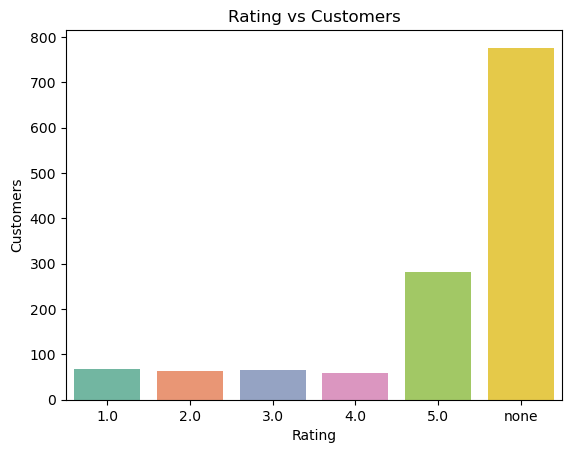

In [18]:
# pick only needed columns and deduplicate
df_ratings = df[['order_id', 'customer_id', 'order_date', 'rating']].drop_duplicates().reset_index(drop=True)
# add last order date & filter only on those who returned
df_ratings['last_order'] = df_ratings.groupby('customer_id')['order_date'].transform('max')
df_ratings = df_ratings[df_ratings['last_order'] != df_ratings['order_date']]
df_ratings['rating'] = df_ratings['rating'].fillna('none')

# group
df_rating_agg = df_ratings.groupby('rating')['customer_id'].nunique()

# convert to df for easier viz
df_rating_agg = df_rating_agg.reset_index()
df_rating_agg.columns = ['rating', 'unique_customers']

# vizualize
sns.barplot(x='rating', y='unique_customers', data=df_rating_agg, palette='Set2')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Customers')
plt.title('Rating vs Customers')

print_result('High rating (5) is better than lower rating, however, no rating doesn\'t mean no return, quite the opposite usually.')
print(df_rating_agg)

# Show plot
plt.show()


# Q3: Sales trend over months


 ----------------------------------- 
 Net sales and gross sales over time 
 ----------------------------------- 



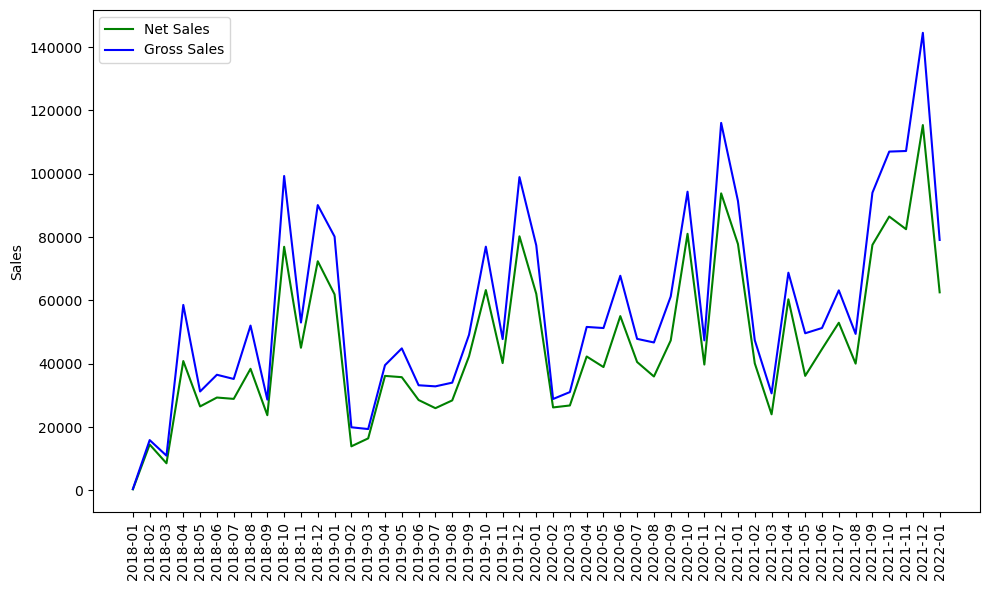

In [19]:
# convert to date
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y', errors ='coerce')

# create sales KPIs
df['discount_abs'] = df['product_price'] * df['item_quantity'] * df['position_discount']
df['sales_gross'] = df['product_price'] * df['item_quantity']
df['sales_net'] = round(df['sales_gross'] - df['discount_abs'], 2)
df[['product_price', 'item_quantity', 'position_discount', 'sales_net', 'discount_abs', 'sales_gross']]

# group
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))[['sales_net', 'sales_gross']].sum().reset_index()
monthly_sales.columns = ['Order Month', 'Net Sales', 'Gross Sales']

# convert Order Month to str for better look on the viz
monthly_sales['Order Month'] = monthly_sales['Order Month'].astype(str)

# vizualize
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Order Month'], monthly_sales['Net Sales'], label='Net Sales', color='green')
plt.plot(monthly_sales['Order Month'], monthly_sales['Gross Sales'], label='Gross Sales', color='blue')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()  # looks better

# show
print_result('Net sales and gross sales over time')
plt.show()


# Q4: Shipping costs vs sales

In [20]:
# group sales to year
df_year_sales = df.groupby([df['order_date'].dt.year, 'shipping_mode'])[['sales_net', 'sales_gross']].sum().reset_index()
df_year_sales.columns = ['year', 'ship', 'Net Sales', 'Gross Sales']

# join with costs
df_sales_costs = pd.merge(df_year_sales, df_costs, on=['year', 'ship'], how='left')
df_sales_costs.columns = ['Year', 'Shipping Mode', 'Net Sales', 'Gross Sales', 'Costs']

# show table
df_sales_costs.head()

,Year,Shipping Mode,Net Sales,Gross Sales,Costs
0,2018,First Class,48232.21,58016.87,70000.0
1,2018,Same Day,16140.10,18969.36,30000.0
2,2018,Second Class,83980.39,98998.54,70000.0
3,2018,Standard Class,256935.49,335762.24,300000.0
4,2019,First Class,71429.60,83105.20,70000.0


In [21]:
# melt unpivot for viz yearly overview
df_cs_melted = df_sales_costs.melt(
    id_vars=['Year', 'Shipping Mode'], 
    value_vars=['Net Sales', 'Gross Sales', 'Costs'], 
    var_name='KPI', 
    value_name='USD'
)

df_cs_melted

,Year,Shipping Mode,KPI,USD
0,2018,First Class,Net Sales,48232.21
1,2018,Same Day,Net Sales,16140.10
2,2018,Second Class,Net Sales,83980.39
3,2018,Standard Class,Net Sales,256935.49
4,2019,First Class,Net Sales,71429.60
5,2019,Same Day,Net Sales,25038.98
6,2019,Second Class,Net Sales,92928.33
7,2019,Standard Class,Net Sales,283584.24
8,2020,First Class,Net Sales,82222.08
9,2020,Same Day,Net Sales,33417.68



 --------------------------------------------------------------------------------------------- 
 Yearly summary. Costs lower than gross sales but higher than net sales. Reconsider discounts. 
 --------------------------------------------------------------------------------------------- 



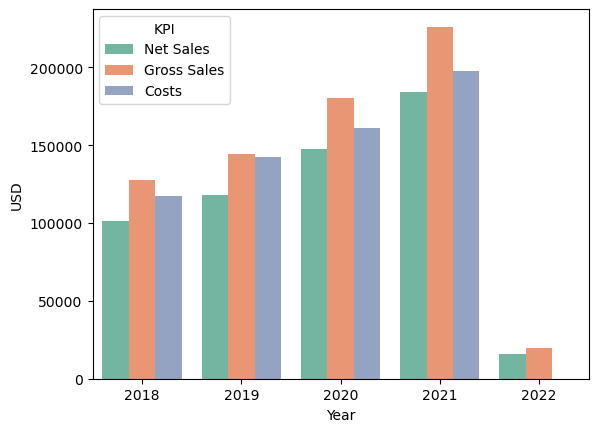

In [22]:
#viz yearly overview
sns.barplot(x='Year', y='USD', hue='KPI', data=df_cs_melted, palette='Set2', errorbar=None)
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend(title='KPI')
print_result('Yearly summary. Costs lower than gross sales but higher than net sales. Reconsider discounts.')
plt.show()


 ------------------- 
 First Class Summary 
 ------------------- 



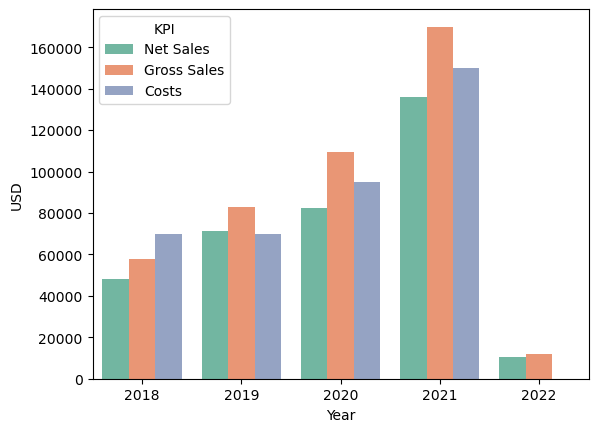


 ---------------- 
 Same Day Summary 
 ---------------- 



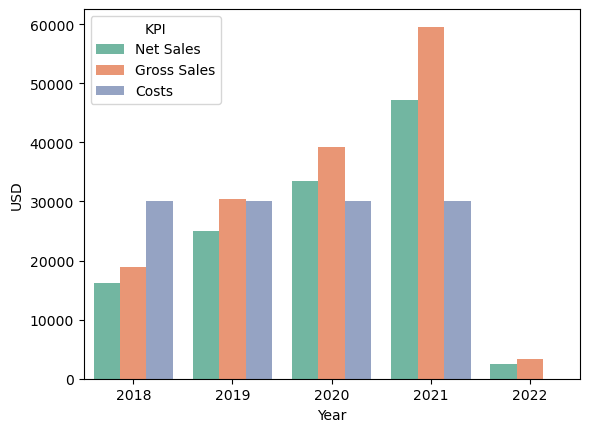


 -------------------- 
 Second Class Summary 
 -------------------- 



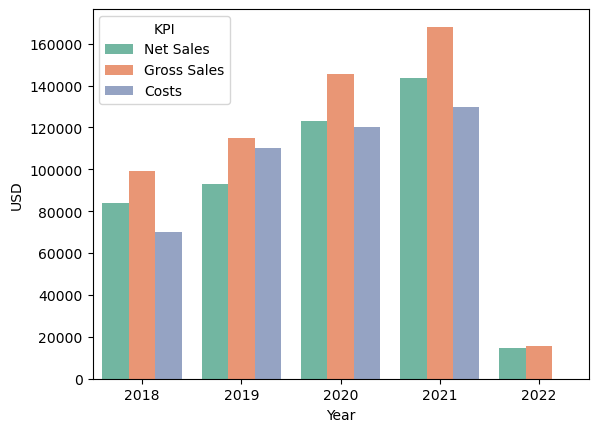


 ---------------------- 
 Standard Class Summary 
 ---------------------- 



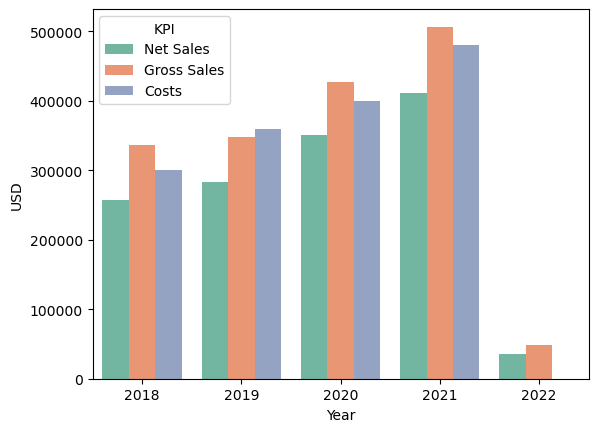

In [23]:
# loop melt over shipping modes and do viz for each
for mode in df_sales_costs['Shipping Mode'].unique():
    df_mode = df_sales_costs[df_sales_costs['Shipping Mode'] == mode]
    df_melted = df_mode.melt(
        id_vars=['Year'], 
        value_vars=['Net Sales', 'Gross Sales', 'Costs'], 
        var_name='KPI', 
        value_name='USD'
    )
    
    sns.barplot(x='Year', y='USD', hue='KPI', data=df_melted, palette='Set2', errorbar=None)
    plt.xlabel('Year')
    plt.ylabel('USD')
    plt.legend(title='KPI')

    print_result(f'{mode} Summary')
    plt.show()